In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt  
from copy import deepcopy
import time 
import pickle 


## Stored results from e-AutoMFIS

In [2]:
with open ('cis_challenge3.results','rb') as f:
    daily_results = pickle.load(f)

In [3]:
daily_results

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [11.50627073,  9.44817744,  5.42526929, ...,  9.7901334 ,
        20.87236497,  6.03259831],
       [11.48652824,  8.4248898 ,  3.94626453, ...,  9.7901334 ,
        18.19204709,  6.19115494],
       [12.29861554,  7.97414887,  4.03017548, ...,  9.7901334 ,
         5.75287884,  6.05805527]])

In [4]:
dataset = pd.read_csv('series/consumption.csv')
info_ = pd.read_csv('series/addInfo.csv')
weather_ = pd.read_csv('series/weather-avg.csv')

In [5]:
dataset

,meter_id,2017-01-01 00:00:00,2017-01-01 00:30:00,2017-01-01 01:00:00,2017-01-01 01:30:00,2017-01-01 02:00:00,2017-01-01 02:30:00,2017-01-01 03:00:00,2017-01-01 03:30:00,2017-01-01 04:00:00,...,2017-12-31 19:00:00,2017-12-31 19:30:00,2017-12-31 20:00:00,2017-12-31 20:30:00,2017-12-31 21:00:00,2017-12-31 21:30:00,2017-12-31 22:00:00,2017-12-31 22:30:00,2017-12-31 23:00:00,2017-12-31 23:30:00
0,0xa62b9f23553ff183f61e2bf943aab3d5983d02d7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.052,0.091,0.083,0.082,0.090,0.074,0.092,0.076,0.055,0.036
1,0x459c834d1f6cfb5b734b82aa9f5410fa97fb70da,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.402,0.639,0.537,0.834,0.868,0.394,0.073,0.077,0.049,0.048
2,0x4a1ed36825360a058cec2bdd409fc2459e1ce54f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.110,0.123,0.012,0.034,0.006,0.027,0.001,0.044,0.004,0.035
3,0x5b76d3c0e0aefc6e0a8d1d031f96388a23263407,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.118,0.096,0.135,0.041,0.018,0.057,0.018,0.038,0.040,0.014
4,0x943ebe39ef2be6ef807c42c5a647e27112ca5b0f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.022,0.010,0.036,0.006,0.024,0.014,0.028,0.006,0.024,0.025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3243,0x7dd7a7b8ee1bec7c44b24f738c752482f6161065,0.011,1.089,0.014,0.204,0.015,0.159,0.014,0.013,0.174,...,0.176,0.200,0.184,0.177,0.182,0.201,0.181,0.181,0.177,0.198
3244,0xfdaf9f857621ec06f2cf801f42a020a322835090,0.015,1.523,0.105,0.296,0.067,0.171,0.025,0.260,0.013,...,0.022,0.009,0.028,0.020,0.010,0.009,0.008,0.033,0.015,0.013
3245,0xd28f2f001e0cd4d6c121a3cb2e1427207e170e18,0.222,0.276,0.097,0.058,0.045,0.045,0.038,0.034,0.043,...,0.144,0.169,0.145,0.200,0.170,0.127,0.135,0.200,0.118,0.106
3246,0x47218b46abb2fcaade487a211911406dc6e13730,0.195,2.881,1.765,1.391,1.609,1.362,1.352,1.321,0.701,...,0.186,0.163,0.170,0.175,0.167,0.185,0.171,0.196,0.260,0.318


In [6]:
np.unique(info_['num_bedrooms'])

array([ 1.,  2.,  3.,  4.,  5., nan])

In [7]:
null_info = dataset.isna().sum(axis=1)

In [8]:
null_info

0       16416
1       16416
2       16416
3       16416
4       16416
        ...  
3243     1392
3244     2400
3245     1344
3246     1296
3247     1392
Length: 3248, dtype: int64

In [9]:
null_count = {}
for val in np.unique(null_info):
    idd = np.where(null_info == val)
    null_count[val] = len(idd[0])

In [10]:
null_count

{192: 1,
 1200: 2,
 1248: 15,
 1296: 60,
 1344: 83,
 1392: 62,
 1440: 23,
 1488: 7,
 1536: 1,
 1584: 1,
 1632: 2,
 1709: 1,
 1776: 2,
 1872: 2,
 1920: 2,
 1968: 1,
 2049: 1,
 2112: 1,
 2256: 1,
 2400: 1,
 2640: 3,
 2688: 22,
 2736: 63,
 2784: 77,
 2832: 48,
 2880: 27,
 2928: 3,
 2976: 5,
 3024: 1,
 3072: 3,
 3120: 2,
 3168: 2,
 3264: 1,
 3299: 1,
 3312: 1,
 3360: 2,
 3504: 1,
 3552: 1,
 3600: 2,
 3840: 1,
 3984: 5,
 4032: 21,
 4080: 56,
 4128: 74,
 4176: 64,
 4224: 21,
 4272: 10,
 4320: 2,
 4368: 1,
 4416: 1,
 4464: 1,
 4512: 1,
 4656: 1,
 4704: 2,
 4752: 1,
 4783: 1,
 4800: 1,
 4992: 2,
 5088: 1,
 5280: 1,
 5472: 5,
 5520: 33,
 5568: 76,
 5616: 82,
 5664: 38,
 5712: 8,
 5760: 4,
 5808: 4,
 5856: 1,
 5904: 2,
 5952: 2,
 6000: 2,
 6048: 1,
 6096: 2,
 6144: 1,
 6192: 1,
 6288: 2,
 6336: 1,
 6384: 1,
 6480: 1,
 6576: 1,
 6624: 1,
 6912: 5,
 6960: 25,
 7008: 86,
 7056: 80,
 7104: 36,
 7152: 13,
 7200: 8,
 7248: 3,
 7344: 2,
 7392: 3,
 7440: 1,
 7488: 1,
 7536: 2,
 7584: 1,
 7776: 2,
 8064:

In [11]:
range_list = [0]*(20000//500)
for k,v in null_count.items():
    i = k // 500
    range_list[i] += v

In [12]:
range_list

[1,
 0,
 252,
 12,
 4,
 248,
 13,
 10,
 251,
 9,
 7,
 250,
 12,
 32,
 233,
 5,
 264,
 8,
 5,
 259,
 8,
 5,
 264,
 6,
 2,
 264,
 7,
 263,
 5,
 5,
 270,
 1,
 265,
 6,
 2,
 0,
 0,
 0,
 0,
 0]

Text(0.5, 1.0, 'Missing values histogram')

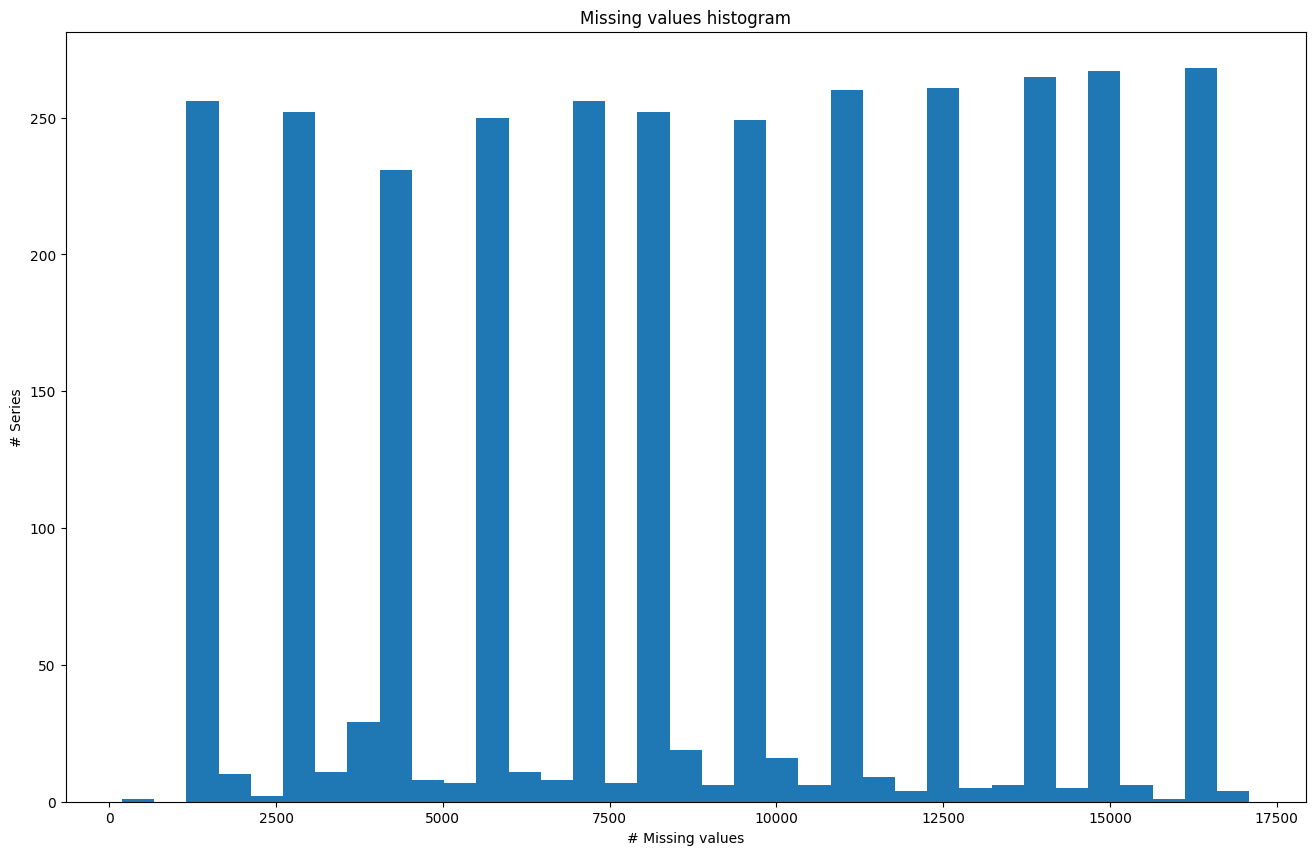

In [13]:
plt.figure(figsize=(16,10))
plt.hist(null_info,bins=35)
plt.ylabel('# Series')
plt.xlabel('# Missing values')
plt.title('Missing values histogram')

In [14]:
info_

,meter_id,dwelling_type,num_occupants,num_bedrooms,heating_fuel,hot_water_fuel,boiler_age,loft_insulation,wall_insulation,heating_temperature,...,refrigerator,tumble_dryer,washing_machine,game_console,laptop,pc,router,set_top_box,tablet,tv
0,0x02b7418b821b2edeeb2baa23ba1580566b4b0e43,semi_detached_house,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0xaf32b2b497e9eb9c3f3de907aedc6a7914a11f41,terraced_house,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0xdd45ab28a7a40eadc04607d6da42e5ad923b1339,semi_detached_house,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0x2b538a5ebfc3780aef25227267063cb6410d943b,detached_house,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0xee032ed498c9e99a4c65e0f39896fb30e513c6b7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2138,0xb9c600842cb2d195d461d675f2758ddbf5bb45bb,terraced_house,2.0,2.0,gas,gas,old,y,n,18_to_20,...,0.0,0.0,1.0,1.0,0.0,2.0,1.0,1.0,0.0,1.0
2139,0x429e76a41f3141d9e62c4975e6b5df303cb45e64,bungalow,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2140,0x65fbd9ba598e703d742a32058ea2b323fe4c1fca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2141,0x101f2dc409b3b95d2bb08ebe5d282f54317e3f8c,bungalow,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
info_['dwelling_type'].unique()

array(['semi_detached_house', 'terraced_house', 'detached_house', nan,
       'bungalow', 'flat'], dtype=object)

In [16]:
info_['num_bedrooms'].fillna(0,inplace=True)

In [17]:
#explode = (0, 0, 0, 0.1, 0, 0,)
#plt.pie(num_bedrooms, explode=explode, labels=np.arange(0,6), autopct='%1.1f%%',shadow=True,radius=2)

In [18]:
dataset.fillna(method='pad',inplace=True)

In [19]:
dataset.isna().sum(axis=1)

0       16416
1       16416
2       16416
3       16416
4       16416
        ...  
3243        0
3244        0
3245        0
3246        0
3247        0
Length: 3248, dtype: int64

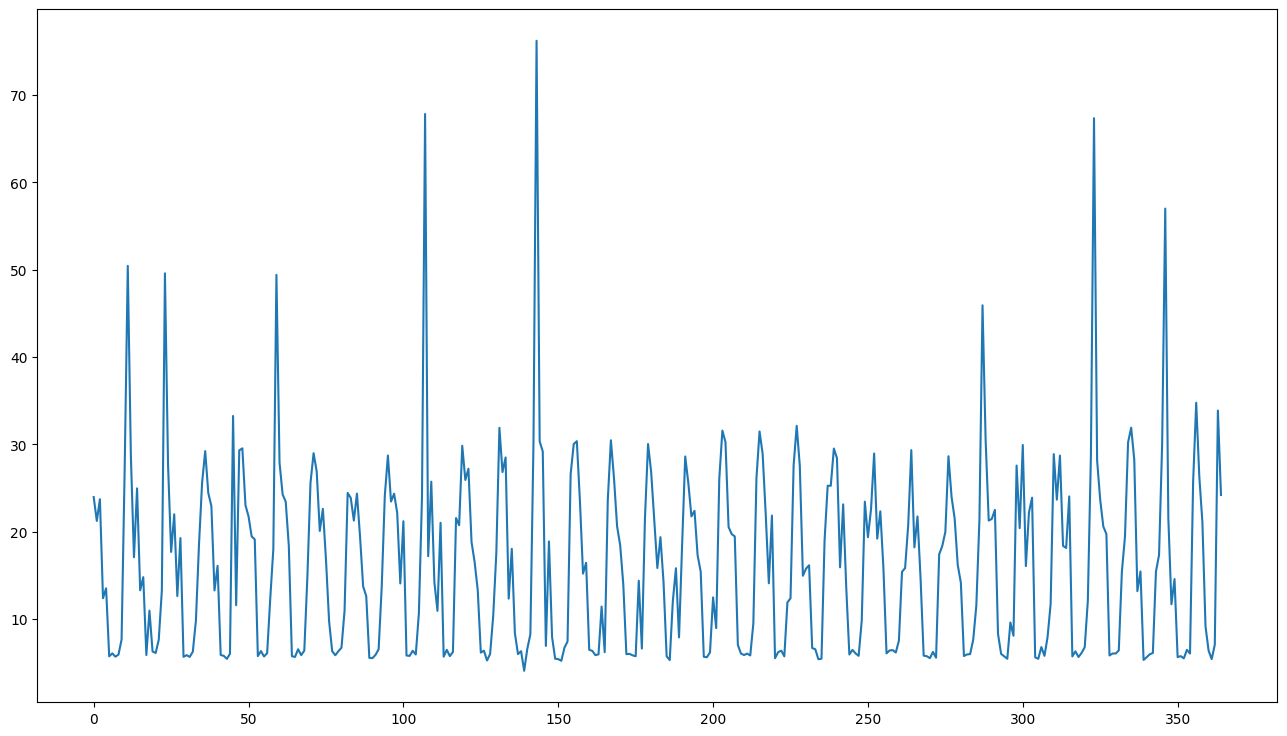

In [20]:
a = dataset.iloc[3246].values
aa = pd.Series(data = a[1:], index=pd.date_range(start='2017-01-01 00:00:00',freq='30min',periods=a.shape[0]-1))
b = aa.groupby(by=[aa.index.day, aa.index.month, aa.index.year]).sum()
plt.figure(figsize=(16,9))
plt.plot(b.values)

In [21]:
a.shape

(17521,)

In [22]:
b

1   1   2017    23.965
    2   2017    21.233
    3   2017    23.719
    4   2017    12.383
    5   2017    13.515
                 ...  
31  5   2017     6.378
    7   2017     5.408
    8   2017     7.055
    10  2017    33.873
    12  2017    24.201
Length: 365, dtype: object

In [23]:
'''
a = dataset.iloc[3238].values
aa = pd.Series(data = a[1:], index=pd.date_range(start='2017-01-01 00:00:00',freq='30min',periods=a.shape[0]-1))
b = aa.groupby(by=[aa.index.day, aa.index.month, aa.index.year]).sum()
plt.figure(figsize=(16,9))
plt.plot(b.values)
plt.xlabel('Timestamp (day)')
plt.ylabel('Consumption (kWh)')
'''

"\na = dataset.iloc[3238].values\naa = pd.Series(data = a[1:], index=pd.date_range(start='2017-01-01 00:00:00',freq='30min',periods=a.shape[0]-1))\nb = aa.groupby(by=[aa.index.day, aa.index.month, aa.index.year]).sum()\nplt.figure(figsize=(16,9))\nplt.plot(b.values)\nplt.xlabel('Timestamp (day)')\nplt.ylabel('Consumption (kWh)')\n"

In [24]:
#aa[:48].sum()

In [25]:
#b.values

In [26]:
#Treinar com 3246 e testar com 3238
c = dataset.iloc[3246].values
cc = pd.Series(data = c[1:], index=pd.date_range(start='2017-01-01 00:00:00',freq='30min',periods=a.shape[0]-1))
e = aa.groupby(by=[cc.index.day, cc.index.month, cc.index.year]).sum()
f = e.values

In [27]:
e

1   1   2017    23.965
    2   2017    21.233
    3   2017    23.719
    4   2017    12.383
    5   2017    13.515
                 ...  
31  5   2017     6.378
    7   2017     5.408
    8   2017     7.055
    10  2017    33.873
    12  2017    24.201
Length: 365, dtype: object

In [28]:
f

array([23.96500000000001, 21.233000000000004, 23.719000000000005,
       12.383000000000003, 13.515000000000004, 5.723999999999997,
       6.063999999999998, 5.687000000000001, 5.9250000000000025, 7.649,
       27.261999999999993, 50.44800000000001, 28.688999999999986, 17.075,
       24.966, 13.287999999999995, 14.790999999999999, 5.877,
       10.957500000000001, 6.281999999999999, 6.111000000000001,
       7.617000000000001, 13.251999999999997, 49.59100000000001,
       27.664000000000012, 17.680999999999994, 21.999000000000013,
       12.629999999999999, 19.270999999999997, 5.667000000000001,
       5.8610000000000015, 5.658999999999997, 6.254000000000001,
       9.812999999999999, 18.559, 25.614000000000004, 29.229,
       24.427000000000003, 22.927999999999997, 13.274000000000003, 16.087,
       5.881000000000002, 5.780999999999997, 5.4319999999999995,
       6.020000000000001, 33.25600000000001, 11.579000000000002,
       29.317000000000004, 29.54800000000001, 23.037999999999997,

In [29]:
d_values = dataset.T.values

In [30]:
v_values_2 = dataset.values
v_values_2.shape

(3248, 17521)

In [31]:
v_values = d_values.T

In [32]:
v_values.shape

(3248, 17521)

In [33]:
v_values = v_values[:,1:]

In [34]:
v_values.shape

(3248, 17520)

In [35]:
for k in range(v_values.shape[0]):
    aa = pd.Series(data = v_values[k,:], index=pd.date_range(start='2017-12-04 00:00:00',freq='30min',periods=v_values.shape[1]))
    b = aa.groupby(by=[aa.index.day, aa.index.month, aa.index.year]).sum()

    if k == 0:
        daily_values = np.ndarray((b.values.shape[0], v_values.shape[0]))

    daily_values[:,k] = b.values

In [36]:
daily_values.shape

(365, 3248)

In [37]:
daily_values

array([[ 0.    ,  0.    ,  0.    , ...,  5.956 , 28.243 , 14.353 ],
       [ 0.    ,  0.    ,  0.    , ...,  5.271 , 23.719 , 17.493 ],
       [ 0.    ,  0.    ,  0.    , ...,  5.582 , 13.188 ,  8.638 ],
       ...,
       [ 0.    ,  0.    ,  0.    , ..., 15.4265, 15.4265, 15.4265],
       [ 0.    ,  0.    ,  0.    , ...,  7.477 , 30.238 , 17.492 ],
       [ 0.    ,  0.    ,  0.    , ...,  7.966 , 28.176 , 15.041 ]])

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
val = np.where(daily_values == 0, np.nan, daily_values)

In [40]:
val = np.copy(daily_values)

In [41]:
val[val == 0] = np.nan

In [42]:
scal = StandardScaler()

In [43]:
n_val = scal.fit_transform(val)

In [44]:
n_val[0]

array([        nan,         nan,         nan, ..., -0.18457939,
        1.11790102,  0.03366204])

In [45]:
np.where(n_val == np.nan)

(array([], dtype=int64), array([], dtype=int64))

In [46]:
n_val[:,-1]

array([ 3.36620431e-02,  3.55479060e-01, -5.52065425e-01, -2.80570751e-01,
       -5.74510625e-01, -6.04540047e-01, -6.02490257e-01, -7.43413314e-01,
        1.43377048e-01, -3.71171465e-01,  8.25188419e-01,  4.40524900e+00,
       -1.92327295e-01,  4.63298009e-01, -6.53837494e-01, -6.42154254e-02,
       -7.68010793e-01, -6.56399732e-01, -7.08464396e-01, -6.66546192e-01,
       -1.78286234e-01,  5.05216213e-01,  1.04646324e+00,  3.45640068e-01,
        4.29885872e-02,  7.11630058e-01, -5.92548776e-01,  3.02798897e-02,
       -7.82974259e-01, -7.78157253e-01, -7.01597599e-01, -7.65756024e-01,
       -8.63735982e-01,  2.03425700e+00,  3.73302039e+00,  1.24262757e-01,
       -2.01243881e-01,  1.04759062e+00, -3.80907967e-01,  4.74264385e-01,
       -6.93910887e-01, -3.14341040e-01, -6.46970698e-01, -7.11334102e-01,
       -9.36298545e-01,  1.35669894e+00,  3.64518689e+00, -2.79033408e-01,
       -3.52723356e-01,  5.83825656e-01, -4.08682621e-01, -7.53354795e-01,
       -6.92271055e-01, -

In [47]:
num_nulls = dataset.isna().sum(axis=1)
not_null_index = np.where(num_nulls == 0)[0]

for k,i in enumerate(not_null_index):
    a = dataset.iloc[i].values
    aa = pd.Series(data = a[1:], index=pd.date_range(start='2017-01-01 00:00:00',freq='30min',periods=a.shape[0]-1))
    b = aa.groupby(by=[aa.index.day, aa.index.month, aa.index.year]).sum()

    if k == 0:
        daily_values2 = np.ndarray((b.values.shape[0], not_null_index.shape[0]))

    daily_values2[:,k] = b.values


daily_dataset = pd.DataFrame(daily_values2)

In [48]:
num_nulls

0       16416
1       16416
2       16416
3       16416
4       16416
        ...  
3243        0
3244        0
3245        0
3246        0
3247        0
Length: 3248, dtype: int64

In [49]:
not_null_index.shape

(247,)

In [50]:
daily_dataset

,0,1,2,3,4,5,6,7,8,9,...,237,238,239,240,241,242,243,244,245,246
0,20.9120,10.2690,4.4890,6.0200,5.5920,6.7070,9.5920,10.1000,13.6330,10.3040,...,33.068,15.035,33.071,3.158,8.166,2.317,14.437,7.824,23.965,11.302
1,13.1285,10.3600,3.9540,4.8240,4.5360,5.2750,5.1100,9.2180,12.1000,7.0390,...,23.369,12.784,34.765,3.754,10.982,2.444,6.383,6.153,21.233,12.061
2,12.9355,9.8410,3.2760,4.1230,6.1450,6.8810,6.0440,6.9610,11.2930,6.3820,...,23.301,13.184,24.690,34.193,12.731,2.151,6.156,5.271,23.719,17.493
3,15.2925,9.5410,3.8970,5.4460,2.5240,4.6850,6.0530,9.1600,6.6960,4.7570,...,17.836,8.776,15.140,16.630,16.480,2.149,8.269,6.299,12.383,10.308
4,21.2105,8.8350,3.0190,5.2920,4.6390,2.7520,5.8520,7.3740,23.9200,4.6640,...,16.649,11.185,33.202,17.447,20.791,2.036,7.434,1.569,13.515,14.320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,13.5785,7.2870,2.6570,3.0730,2.6750,2.9230,6.4530,4.7970,14.1220,4.0420,...,9.954,6.719,17.312,15.656,12.960,2.320,4.798,5.082,6.378,6.385
361,11.5505,7.6080,3.5120,4.6550,4.6160,3.5240,5.1550,8.6350,14.9510,5.2010,...,9.483,7.922,20.883,14.957,7.516,5.605,2.997,5.828,5.408,7.179
362,15.4460,7.6740,4.0130,5.6690,6.7750,4.9190,5.0720,7.0920,14.1070,5.3750,...,10.295,7.661,29.353,11.663,7.896,5.076,5.076,4.465,7.055,6.553
363,12.8145,12.8145,12.8145,12.8145,12.8145,12.8145,12.8145,12.8145,12.8145,12.8145,...,33.873,33.873,33.873,33.873,33.873,33.873,33.873,33.873,33.873,33.873


In [51]:
num_nulls = dataset.isna().sum(axis=1)
not_null_index = np.where(num_nulls == 0)[0]
pivot_numbers = daily_values[:,not_null_index]

In [52]:
n_val.shape

(365, 3248)

In [53]:
n_val[-247:,2800]

array([-7.90878665e-02,             nan,  8.50905740e-01,  1.76512267e+00,
        1.82888011e-01,  1.40142874e+00,  9.71306697e-01, -1.73460104e+00,
       -4.42574207e-01,  5.02158137e-01,  7.07905673e-02,  2.41220199e-01,
        1.90275342e+00,             nan,  2.34577388e-01,  4.17002801e+00,
        1.22331836e+00, -5.65673807e-01,  1.85583856e+00, -1.14170215e-01,
       -6.53898647e-01,  9.57190723e-01, -8.27545890e-01, -1.24342020e-01,
        1.44069081e-01,             nan,  8.81005979e-01, -3.79467498e-01,
       -3.21342897e-01,  3.75114368e-01,  5.13990645e-01, -1.79560390e-01,
       -1.91808074e-01, -1.13446454e+00, -8.11250243e-01,  2.05722675e-01,
        1.96173634e-01,             nan,  7.79495516e-01,  2.70174976e-03,
        5.73775948e-01,  1.57354704e-01,  3.69301908e-01, -1.04478658e+00,
       -4.57520532e-01,  5.13160294e-01, -2.25229719e-01, -6.13626602e-01,
        2.93892821e+00,             nan,  9.31449829e-01,  1.17290248e-01,
        2.51184416e-01, -

In [54]:
n_val.shape

(365, 3248)

In [55]:
mask = np.isnan(n_val[:,0])
idx = np.where(mask == False)
n_val[idx,]

array([[[ 0.71618713, -0.91273754, -0.86113518, ..., -0.21746912,
          0.93879789,  0.34564007],
        [ 0.98211133, -1.75070948, -1.92225108, ...,  0.07568884,
          0.74280524,  0.12426276],
        [-0.89535345, -0.20379757,  0.94077823, ...,  0.02570119,
          0.873931  ,  0.58167338],
        ...,
        [ 0.40527577, -0.96940367, -1.24855391, ..., -0.17021239,
          0.39063094,  0.11134908],
        [-0.48147144, -0.66571244,  0.47572882, ...,  0.0297382 ,
          0.69334308,  0.25432193],
        [ 0.09036554,  1.40566785,  1.27897372, ..., -0.24406587,
          1.45838258,  0.71603711]]])

In [56]:
n_val.shape

(365, 3248)

In [57]:
mmask = np.isnan(n_val[:,-247:])
idx = np.where(mmask == True)[0]

In [58]:
idx

array([  0,   3,   4,   6,   7,   9,   9,  12,  15,  16,  16,  18,  19,
        21,  24,  28,  31,  32,  36,  40,  43,  44,  48,  51,  52,  52,
        53,  53,  55,  57,  60,  64,  65,  65,  67,  72,  74,  75,  76,
        76,  77,  77,  78,  79,  80,  81,  87,  88,  89,  89,  91,  93,
        94, 100, 101, 101, 102, 103, 105, 106, 111, 111, 112, 113, 113,
       113, 115, 117, 117, 123, 124, 125, 125, 125, 127, 129, 129, 135,
       136, 137, 139, 141, 149, 149, 153, 159, 160, 161, 165, 165, 169,
       172, 173, 181, 184, 185, 185, 186, 194, 196, 197, 198, 201, 206,
       208, 209, 209, 210, 212, 213, 220, 221, 221, 223, 223, 229, 230,
       233, 233, 234, 235, 235, 241, 242, 245, 245, 246, 253, 257, 258,
       258, 259, 259, 263, 265, 269, 270, 270, 275, 281, 281, 281, 282,
       283, 287, 293, 293, 293, 294, 295, 295, 295, 298, 299, 300, 302,
       305, 306, 307, 307, 307, 311, 312, 317, 318, 319, 322, 323, 324,
       327, 329, 329, 330, 331, 331, 335, 337, 340, 340, 341, 34

In [59]:
pivot_val = np.copy(n_val[:,-247:])

In [60]:
pd_pivot = pd.DataFrame(pivot_val)
pd_pivot.fillna(method='pad',inplace=True)
pd_pivot.fillna(method='ffill',inplace=True)
pd_pivot.fillna(method='bfill',inplace=True)

In [61]:
pd_pivot

,0,1,2,3,4,5,6,7,8,9,...,237,238,239,240,241,242,243,244,245,246
0,2.651997,0.110532,-0.145266,0.311226,1.003075,0.622106,-0.734270,1.123271,0.421825,0.268978,...,1.135217,0.565434,2.236568,-1.312901,-0.113282,-0.516969,0.485866,-0.184579,1.117901,0.033662
1,-0.454202,0.390953,-0.418642,-0.625824,-0.092131,0.517176,-0.062773,-0.323558,-0.112986,0.150104,...,0.334780,0.127637,0.344582,1.313682,-0.079011,-0.542569,-0.167342,-0.265913,0.698076,0.355479
2,0.513015,-0.462127,-0.600045,-1.642684,-0.449291,-0.696783,-0.519571,-0.132837,-1.377941,-0.152206,...,-0.502804,-0.427027,0.049152,-0.030143,0.146322,-0.544976,-0.293421,-0.228986,-0.279196,-0.552065
3,0.215121,0.337233,-0.564719,-0.216444,-0.746654,-0.658506,-0.355920,0.193032,2.507986,-0.090719,...,0.621674,0.185521,-0.723270,-0.630740,0.290309,-0.535021,-0.433909,-0.361970,-0.069933,-0.280571
4,-0.325740,-0.241336,-0.450786,-0.548509,-1.144113,-0.336126,-0.712125,-1.216222,1.061144,-0.122487,...,-0.777159,-1.109306,-0.805180,-0.275938,1.041879,-0.524299,-0.422884,-0.342735,-1.010085,-0.574511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,-0.718779,-0.433656,-0.555490,0.022273,0.490571,-1.270270,-0.628047,-1.387365,0.494721,-1.344024,...,-0.978824,-0.528752,-0.459547,-0.515042,-0.068968,-0.123232,-0.341669,-0.432737,-0.941414,-0.620323
361,-0.155408,-0.205344,-0.311711,-0.833899,-0.498039,-0.751888,-0.355169,-0.022004,0.883031,-0.517369,...,-0.984763,-0.422997,0.003352,-0.302195,-0.221366,-0.135047,-0.464473,-0.341192,-0.909027,-0.808904
362,-0.337896,2.261498,2.778811,2.652071,2.240624,2.642841,2.669384,1.685330,0.365914,2.521101,...,-0.407628,0.401489,-0.820971,-0.275811,0.259365,0.909796,0.844617,0.939905,-0.071464,0.143685
363,-0.233145,-0.091456,1.875300,0.202557,-0.403143,-0.404429,-0.186263,-0.690475,-0.824965,0.070513,...,1.074406,0.241452,-0.035275,1.925797,-0.135250,0.812920,0.794349,-0.003983,1.303036,0.355377


In [62]:
pd_pivot.isnull().sum()

0      0
1      0
2      0
3      0
4      0
      ..
242    0
243    0
244    0
245    0
246    0
Length: 247, dtype: int64

In [63]:
pd_val = pd_pivot.values

In [64]:
daily_values.shape[1] - pivot_numbers.shape[1]

3001

In [65]:
best_match = np.zeros((daily_values.shape[1] - pivot_numbers.shape[1],2))

for i in range(best_match.shape[0]):
    mask = np.isnan(n_val[:,i])
    idx = np.where(mask == False)

    t = n_val[idx,i].reshape(-1,1)

    blah = np.repeat(t, pivot_numbers.shape[1], axis=1)
    #print(blah.shape)
    #print(t.shape)
    c = np.mean(abs(blah - pd_val[idx,:]),axis=1).reshape(-1,1)
    #print(c)
    min_arg = np.argmin(c)
    # print(min_arg, c[min_arg], c[min_arg-1], c[min_arg+1])
    best_match[i,:] = np.array([min_arg,c[min_arg]])

C:\Users\Diego\AppData\Local\Temp\ipykernel_3880\2754503892.py:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  best_match[i,:] = np.array([min_arg,c[min_arg]])


In [75]:
best_match

array([[ 19.        ,   0.60044558],
       [179.        ,   0.60026261],
       [ 51.        ,   0.73357096],
       ...,
       [ 72.        ,   0.63046303],
       [132.        ,   0.78290174],
       [232.        ,   0.80289906]])

In [66]:
daily_results[:31,:] = daily_values2[:31,:]

In [67]:
real_months = daily_results 
pred_months = daily_values2


In [68]:
month_rAE = np.mean(np.sum(np.abs(real_months - pred_months), axis=1) / np.sum(np.abs(real_months - np.mean(real_months, axis=1, keepdims=True)), axis=1))


In [69]:
month_rAE

0.7765957106218461

In [70]:
metrics = np.mean(abs(np.divide((daily_results - daily_values2),daily_values2+0.0001)),axis=0)

In [71]:
metrics[np.where(metrics > 1.0)]

array([5.05692125e+00, 1.03050517e+00, 1.17055422e+04, 1.03087335e+00,
       1.14311352e+00, 4.75733718e+00, 1.14688802e+00, 3.22137658e+03,
       1.27124515e+00, 1.22040550e+00, 1.26969050e+00, 1.90384900e+00,
       1.12490678e+00, 2.01854455e+00, 1.00530433e+00, 3.74087060e+03,
       4.43168619e+02, 6.36592639e+00, 1.30529283e+00, 1.41212319e+00,
       1.34184860e+00, 1.63241977e+00, 1.59776213e+00, 2.71788367e+00,
       1.47884536e+00, 3.08310661e+00, 9.30803130e+02, 7.80909543e+03,
       1.40064069e+00, 1.53040351e+00, 5.46997348e+03, 3.38740135e+00,
       1.04869411e+00, 4.97011496e+01, 1.56664439e+00, 2.26070906e+00,
       3.35830826e+00, 4.53005484e+00, 1.25816730e+00, 1.92890320e+00,
       1.44373203e+00, 5.02614801e+03, 1.63872534e+00, 2.30780607e+00,
       2.05436271e+01, 1.36860800e+00, 1.72741614e+00, 1.01027204e+00,
       1.52413537e+00, 1.45890852e+00])

In [72]:
daily_results[:,np.where(metrics > 1.0)] = daily_values2[:,np.where(metrics > 1.0)]

In [73]:
metrics = np.mean(abs(np.divide((daily_results - daily_values2),daily_values2+0.0001)),axis=0)
metrics[np.where(metrics > 1.0)]

array([], dtype=float64)

In [74]:
daily_results

array([[20.912     , 10.269     ,  4.489     , ...,  7.824     ,
        23.965     , 11.302     ],
       [13.1285    , 10.36      ,  3.954     , ...,  6.153     ,
        21.233     , 12.061     ],
       [12.9355    ,  9.841     ,  3.276     , ...,  5.271     ,
        23.719     , 17.493     ],
       ...,
       [11.50627073,  9.44817744,  5.42526929, ...,  9.7901334 ,
        20.87236497,  6.03259831],
       [11.48652824,  8.4248898 ,  3.94626453, ...,  9.7901334 ,
        18.19204709,  6.19115494],
       [12.29861554,  7.97414887,  4.03017548, ...,  9.7901334 ,
         5.75287884,  6.05805527]])

In [76]:
all_daily_results = np.zeros((daily_results.shape[0],daily_values.shape[1]))

In [77]:
daily_values.shape

(365, 3248)

In [80]:
daily_results.shape

(365, 247)

In [78]:
norm_daily_results = (np.copy(daily_results) - scal.mean_[-247:])/ scal.scale_[-247:]

In [84]:
norm_daily_results

array([[ 1.93990351,  0.62087634, -0.03260576, ...,  0.03721854,
         0.72090454, -0.27903341],
       [-0.39627383,  0.66976193, -0.20286927, ..., -0.16118849,
         0.46737617, -0.20124388],
       [-0.45420178,  0.39095294, -0.41864246, ..., -0.26591321,
         0.69807585,  0.35547906],
       ...,
       [-0.88317757,  0.17992701,  0.26536152, ...,  0.27066838,
         0.4339094 , -0.81909173],
       [-0.88910317, -0.36978742, -0.20533108, ...,  0.27066838,
         0.1851771 , -0.80284134],
       [-0.64535936, -0.61192735, -0.17862645, ...,  0.27066838,
        -0.96917213, -0.81648266]])

In [85]:
for i in range(best_match.shape[0]):
    all_daily_results[:,i] = norm_daily_results[:,int(best_match[i,0])]

In [86]:
all_daily_results[:,not_null_index] = norm_daily_results

In [87]:
all_daily_results

array([[ 3.21369047,  0.25363681,  0.66065842, ...,  0.03721854,
         0.72090454, -0.27903341],
       [ 0.12930351,  0.89212233, -1.13202129, ..., -0.16118849,
         0.46737617, -0.20124388],
       [-0.14689772,  0.35723141, -0.55434   , ..., -0.26591321,
         0.69807585,  0.35547906],
       ...,
       [-0.14982654, -0.070125  ,  0.06826395, ...,  0.27066838,
         0.4339094 , -0.81909173],
       [-0.25984389,  0.78354436,  0.23920479, ...,  0.27066838,
         0.1851771 , -0.80284134],
       [-0.39518442,  1.0109299 , -0.90783555, ...,  0.27066838,
        -0.96917213, -0.81648266]])

In [88]:
preds = scal.inverse_transform(all_daily_results)

In [89]:
preds

array([[ 7.62721532, 19.92173528, 15.1801484 , ...,  7.824     ,
        23.965     , 11.302     ],
       [ 4.54194906, 22.52452713,  7.85985361, ...,  6.153     ,
        21.233     , 12.061     ],
       [ 4.2656691 , 20.3440396 , 10.2187788 , ...,  5.271     ,
        23.719     , 17.493     ],
       ...,
       [ 4.26273944, 18.60191742, 12.76114284, ...,  9.7901334 ,
        20.87236497,  6.03259831],
       [ 4.15269073, 22.08190808, 13.45916901, ...,  9.7901334 ,
        18.19204709,  6.19115494],
       [ 4.01731161, 23.00884725,  8.77530195, ...,  9.7901334 ,
         5.75287884,  6.05805527]])

In [90]:
for i in range(best_match.shape[0]):
    f = 1/(1.0 - best_match[i,1])
    preds[:,i] = (preds[:,i] + scal.mean_[i]*f)/(f+1)

In [84]:
preds

array([[ 5.3303367 , 19.1830591 , 13.04994054, ...,  7.824     ,
        23.965     , 11.302     ],
       [ 4.44953367, 19.92636511, 11.50991022, ...,  6.153     ,
        21.233     , 12.061     ],
       [ 4.37065937, 19.30366088, 12.00617662, ...,  5.271     ,
        23.719     , 17.493     ],
       ...,
       [ 4.36982299, 18.80614515, 12.54103455, ...,  9.7901334 ,
        20.87236497,  6.03259831],
       [ 4.33840553, 19.79996184, 12.68788402, ...,  9.7901334 ,
        18.19204709,  6.19115494],
       [ 4.29975657, 20.06467738, 11.70250058, ...,  9.7901334 ,
         5.75287884,  6.05805527]])

In [91]:
month_results = np.zeros((12,preds.shape[1]))

for i in range(preds.shape[1]):
    ser = pd.Series(data=preds[:,i], index=pd.date_range(start='2017-01-01 00:00:00',freq='1D',periods=365))
    month_results[:,i] = ser.groupby(by=[ser.index.month, ser.index.year]).sum().values

In [92]:
#submission2 = pd.read_csv('series/cis-competition/sample_submission2.csv')
submission2 = pd.read_csv('fuzzy_results3.csv')

In [93]:
submission2['AnnualPRED']

0        1593.155280
1        7169.652159
2        4473.491594
3        6910.296751
4       12253.381184
            ...     
3243     2595.301000
3244     2806.490000
3245     3472.157441
3246     6385.669146
3247     5269.287723
Name: AnnualPRED, Length: 3248, dtype: float64

In [88]:
submission2['AnnualPRED'] = np.sum(month_results,axis=0)

In [89]:
submission2['AnnualPRED']

0        1593.155280
1        7169.652159
2        4473.491594
3        6910.296751
4       12253.381184
            ...     
3243     2595.301000
3244     2806.490000
3245     3472.157441
3246     6385.669146
3247     5269.287723
Name: AnnualPRED, Length: 3248, dtype: float64

In [90]:
columns = ['JanPRED','FebPRED','MarPRED','AprPRED','MayPRED','JunPRED','JulPRED','AugPRED','SepPRED','OctPRED','NovPRED','DecPRED']

for i,name in enumerate(columns):
    submission2[name] = month_results[i,:]

In [91]:
submission2

,meter_id,AnnualPRED,AnnualEXP,JanPRED,JanEXP,FebPRED,FebEXP,MarPRED,MarEXP,AprPRED,...,AugPRED,AugEXP,SepPRED,SepEXP,OctPRED,OctEXP,NovPRED,NovEXP,DecPRED,DecEXP
0,0xa62b9f23553ff183f61e2bf943aab3d5983d02d7,1593.155280,The estimation of your energy consumption for ...,140.745531,In January. your energy consumption will be lo...,121.007461,In February. your energy consumption will be l...,134.167554,In March. your energy consumption will be low ...,130.513580,...,134.905956,In August. your energy consumption will be low...,130.706706,In September. your energy consumption will be ...,135.253629,In October. your energy consumption will be lo...,130.860784,In November. your energy consumption will be l...,135.239402,In December. your energy consumption will be l...
1,0x459c834d1f6cfb5b734b82aa9f5410fa97fb70da,7169.652159,The estimation of your energy consumption for ...,591.754108,In January. your energy consumption will be hi...,536.370215,In February. your energy consumption will be h...,600.873147,In March. your energy consumption will be high...,590.151496,...,600.965470,In August. your energy consumption will be hig...,578.556197,In September. your energy consumption will be ...,608.924954,In October. your energy consumption will be hi...,601.166265,In November. your energy consumption will be h...,614.199507,In December. your energy consumption will be h...
2,0x4a1ed36825360a058cec2bdd409fc2459e1ce54f,4473.491594,The estimation of your energy consumption for ...,393.999329,In January. your energy consumption will be hi...,342.160495,In February. your energy consumption will be h...,378.542482,In March. your energy consumption will be high...,367.908749,...,378.657808,In August. your energy consumption will be hig...,366.299387,In September. your energy consumption will be ...,378.055520,In October. your energy consumption will be hi...,367.059639,In November. your energy consumption will be h...,378.617944,In December. your energy consumption will be h...
3,0x5b76d3c0e0aefc6e0a8d1d031f96388a23263407,6910.296751,The estimation of your energy consumption for ...,567.753154,In January. your energy consumption will be hi...,529.601435,In February. your energy consumption will be h...,592.477504,In March. your energy consumption will be high...,569.004639,...,583.339777,In August. your energy consumption will be hig...,568.952820,In September. your energy consumption will be ...,593.749941,In October. your energy consumption will be hi...,577.018623,In November. your energy consumption will be h...,588.958324,In December. your energy consumption will be h...
4,0x943ebe39ef2be6ef807c42c5a647e27112ca5b0f,12253.381184,The estimation of your energy consumption for ...,1041.954616,In January. your energy consumption will be hi...,910.414404,In February. your energy consumption will be h...,1041.133157,In March. your energy consumption will be high...,1008.796534,...,1046.196206,In August. your energy consumption will be hig...,1008.740043,In September. your energy consumption will be ...,1043.074439,In October. your energy consumption will be hi...,1012.136607,In November. your energy consumption will be h...,1043.708856,In December. your energy consumption will be h...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3243,0x7dd7a7b8ee1bec7c44b24f738c752482f6161065,2595.301000,The estimation of your energy consumption for ...,240.892500,In January. your energy consumption will be lo...,173.001000,In February. your energy consumption will be l...,186.374000,In March. your energy consumption will be low ...,254.873000,...,218.523000,In August. your energy consumption will be low...,192.270500,In September. your energy consumption will be ...,224.825500,In October. your energy consumption will be lo...,236.330500,In November. your energy consumption will be l...,280.797500,In December. your energy consumption will be l...
3244,0xfdaf9f857621ec06f2cf801f42a020a322835090,2806.490000,The estimation of

In [92]:
#submission2.to_excel('sample_submission_fuzzy5.xlsx',index=False)

In [93]:
# submission2.to_csv('fuzzy_results3.csv',index=False)

d:\Users\lemos\anaconda3\envs\eautomfis_env\lib\site-packages\tslearn\bases\bases.py:15: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)


Text(0, 0.5, 'Distância')

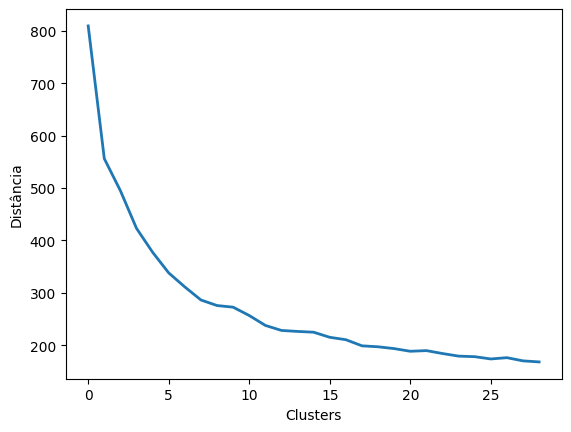

In [94]:
# %pip install tslearn
from tslearn.clustering import TimeSeriesKMeans
model = TimeSeriesKMeans(n_clusters=6, metric="dtw", max_iter=10)
blah = model.fit_predict(daily_values[-30:,:].T)

inertias = []
distortion = []

for i in range(1,30):
    model = TimeSeriesKMeans(n_clusters=i, metric="dtw", max_iter=10)
    blah = model.fit_predict(daily_values[-30:,:].T)
    inertias.append(model.inertia_)


plt.plot(inertias,linewidth=2)
plt.xlabel('Clusters')
plt.ylabel('Distância')

In [95]:
daily_results[:,20]

array([30.832     , 27.714     , 17.602     , 22.933     , 21.712     ,
       14.039     , 15.736     , 13.017     , 12.238     , 15.428     ,
       13.7995    , 18.555     , 27.849     , 25.153     , 16.602     ,
       14.465     , 12.093     , 13.444     , 10.997     , 15.18      ,
       14.766     , 16.084     , 19.537     , 15.7555    , 27.594     ,
       24.316     , 15.313     , 14.52      , 12.011     , 18.403     ,
       12.448     , 15.92299133, 26.52193916, 21.15956794, 18.5827377 ,
       26.41786409, 19.63602191, 18.13503141, 19.14407518, 16.66267671,
       17.47360825, 14.86185445, 19.4419133 , 18.69976308, 28.70414247,
       18.66799549, 21.88878181, 20.93319777, 18.28554189, 16.43747889,
       19.40248514, 15.55926826, 19.53639625, 15.71183532, 24.25289668,
       24.39688597, 20.60359247, 26.7686414 , 22.71234673, 19.89170501,
       21.20606466, 16.62095544, 14.98275432, 16.18762171, 24.21377015,
       18.47371334, 21.26868412, 17.13592816, 28.15255406, 25.65

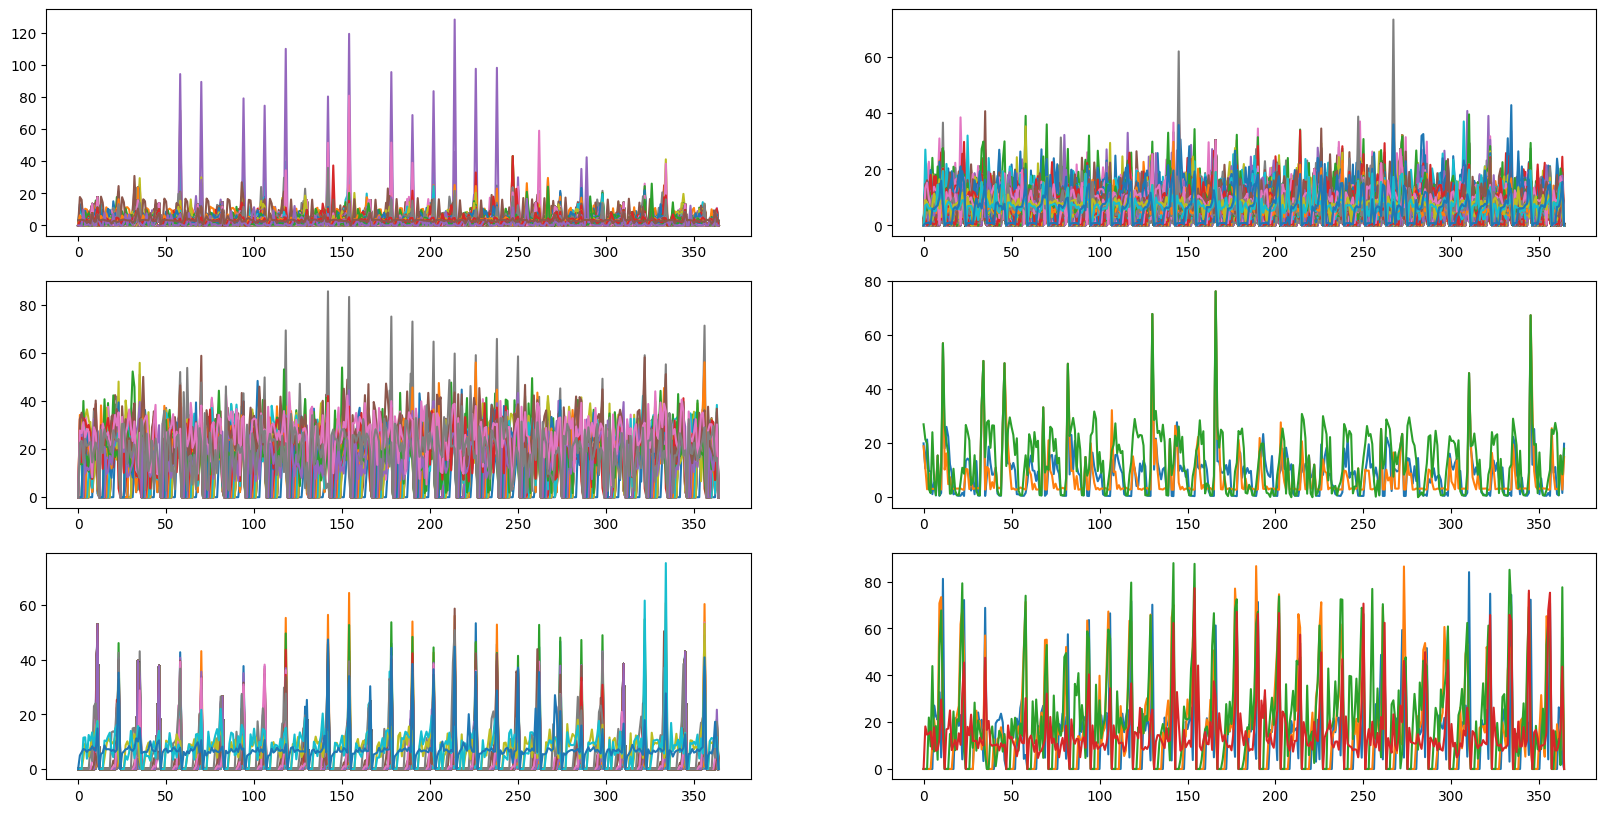

In [96]:
plt.figure(figsize=(20,10))
for i,v in enumerate(blah):
    if v == 0:
        plt.subplot(321)
        plt.plot(daily_values[:,i])
    if v == 1:
        plt.subplot(322)
        plt.plot(daily_values[:,i])
    if v == 2:
        plt.subplot(323)
        plt.plot(daily_values[:,i])
    if v == 3:
        plt.subplot(324)
        plt.plot(daily_values[:,i])
    if v == 4:
        plt.subplot(325)
        plt.plot(daily_values[:,i])
    if v == 5:
        plt.subplot(326)
        plt.plot(daily_values[:,i])

In [97]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt  
from copy import deepcopy
from preprocessing import Preprocess

# e-AutoMFIS for the 247 series

In [98]:
#Basic informations 

num_predictors = 15
num_input = 15
lag = 30
lag_notused = np.array([[4,5],[4,5],[4],[4,5]])
not_used_lag = False

h_val = 30
#Actually, lag stands for all inputs for each serie. Example, lag = 2 uses s(t) and s(t-1) to predict s(t+1)
diff_series = False
detrend_series = False

C:\Users\Diego\AppData\Local\Temp\ipykernel_11192\2299202716.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  lag_notused = np.array([[4,5],[4,5],[4],[4,5]])


In [99]:
#training_data = d[:h_val]
#test_data = d[h_val:]

In [100]:
#bin_values = 12; #Representação da binarização do tempo.
num_series = 1  #Numero de series do problema, extraído dos dados

max_rulesize = 5 #Max numbers of premises rules.
min_activation = 0.9939 #Minimum activation

form_method = 'nmean'
#####Definicao de funcoes######
#detrend_method = ''
#bin_method = ''

fuzzy_method = 'mfdef_cluster'
num_groups = 7

defuzz_method = 'height'

ensemble_rules = None

total_number = lag


filepath = 'results V1'

In [101]:
import seaborn as sns
from copy import deepcopy
from utils import *

import itertools
import json
import os

#For e-autoMFIS, we import all of them.
from autoMFIS_test import autoMFIS
import numpy as np
import scipy.io
from reweight import Reweight
from fuzzyfication import Fuzzification
from defuzzification import Defuzzification
import matplotlib.pyplot as plt
from predict import predict, predict_pattern



def convert_object_to_float(data,datanames):
    
    for name in datanames:
        dname = data[name].values.astype('str')
        dname = [new_value.replace(',','.') for new_value in dname]
        data[name] = dname
        data[name] = data[name].astype(float)
    return data

##Assertion for ensemble rules
#Somehow, when appending rules, ensemble_rules[:,1] has a erroneous form. This part seems to normalize it.

#This module correct this error. Also, we are going to use some assertion to check if rules contains the same antecedents.
def correct_bug(ensemble_rules,max_rulesize=0):
    correct_rule = []
    d_stacked_rules = []
    new_ensemble_rules = np.zeros(shape=ensemble_rules.shape, dtype=object)


    for  n_times in range(ensemble_rules.shape[1]):
        t_rules = ensemble_rules[:,n_times]
        correct_rule = []
        d_stacked_rules = []
        k = 0
        for rule in t_rules:
            #print(rule)
            #print(len(rule))
            #Check if there's a rule bigger than max_rulesize + 1 (#antecedents + #consequent)
            if len(rule) > max_rulesize + 1:
                #print(rule)
                for i in rule:
                    #k += 1
                    if isinstance(i,tuple):
                        #print(i)
                        correct_rule.append(i)
                    else:
                        if len(correct_rule) == 0:
                            #print(i)
                            pass
                            #d_stacked_rules.append(i)
                        else:
                            #print(correct_rule)
                            new_ensemble_rules[k,n_times] = correct_rule
                            k += 1
                            #d_stacked_rules.append(correct_rule)
                            correct_rule = []
                            #d_stacked_rules.append(i)
            else:
                new_ensemble_rules[k,n_times] = rule
                k += 1
                #d_stacked_rules.append(rule)
            
        #new_ensemble_rules[:,i] = np.array(d_stacked_rules)

    return new_ensemble_rules

def remove_duplicates(new_ensemble_rules,ensemble_prem_terms, ensemble_antecedents):
    t_rules = deepcopy(new_ensemble_rules[:,0])
    no_duplicated_ensemble = np.zeros(new_ensemble_rules.shape,dtype=object)
    no_duplicated_prem_terms = np.zeros(ensemble_prem_terms.shape)
    no_duplicated_antecedents = np.zeros(ensemble_antecedents.shape,dtype=object)
    new_t_rules = None

    k = 0
    j = 0
    for rule in t_rules:
        if new_t_rules is None:
            new_t_rules = [rule]
            no_duplicated_ensemble[k,:] = deepcopy(new_ensemble_rules[j,:])
            no_duplicated_prem_terms[k,:] = deepcopy(ensemble_prem_terms[j,:])
            no_duplicated_antecedents[k,:] = deepcopy(ensemble_antecedents[j,:])
            k += 1

        elif not check_duplicate_rules(rule,new_t_rules):
            new_t_rules.append(rule)
            no_duplicated_ensemble[k,:] = deepcopy(new_ensemble_rules[j,:])
            no_duplicated_prem_terms[k,:] = deepcopy(ensemble_prem_terms[j,:])
            no_duplicated_antecedents[k,:] = deepcopy(ensemble_antecedents[j,:])
            k += 1
        j += 1

    new_rules = deepcopy(no_duplicated_ensemble[:k,:])
    new_prem_terms = deepcopy(no_duplicated_prem_terms[:k,:])
    new_antecedents = deepcopy(no_duplicated_antecedents[:k,:])

    return new_rules, new_prem_terms, new_antecedents



In [102]:
#daily_results.shape

In [103]:
#f_preprocess_data = Preprocess(f.reshape(-1,1),h_prev=h_val,num_series=num_series)
#f_yt, f_yp, f_yp_lagged = f_preprocess_data.delay_input(in_sample = f.reshape(-1,1), lag = lag)


#daily_results = np.zeros_like(daily_values)


In [104]:
daily_values.shape

(365, 3248)

In [105]:
# missing_values = np.where(daily_results[50,:] == 0)[0]
for jj in range(12,daily_values.shape[1]):
# for jj in missing_values:
    data_ = daily_values[:,jj].reshape(-1,1)
    val_data_ = daily_values[:,jj].reshape(-1,1)
    # min_activation = 0.1

    preprocess_data = Preprocess(data_,h_prev=h_val,num_series=num_series)
    yt, yp, yp_lagged = preprocess_data.delay_input(in_sample = data_, lag = lag)

    val_yt, _, val_yp_lagged = preprocess_data.delay_input(in_sample = val_data_, lag = lag)

    training_set = data_
    ###############Fuzzificacao

    Fuzzyfy = Fuzzification(fuzzy_method)

    #Lembrete: 
    #axis 0 - Registros da série
    #axis 1 - Valor de pertinência ao conjunto Fuzzy
    #axis 2 - Numero de séries

    first_time = True
    for n in range(num_series):
        
        _, mf_params = Fuzzyfy.fuzzify(training_set[:,n],np.array([]),num_groups=num_groups)
        mX, _ = Fuzzyfy.fuzzify(yp[:,n],mf_params,num_groups=num_groups)
        mY, _ = Fuzzyfy.fuzzify(yt[:,n],mf_params,num_groups=num_groups)
        if first_time:
            mX_ = np.ndarray([mX.shape[0],mX.shape[1], num_series])
            mY_ = np.ndarray([mY.shape[0],mY.shape[1], num_series])
            mf_params_ = np.ndarray([mf_params.shape[0],num_series])
            first_time = False
        mX_[:,:,n] = mX
        mY_[:,:,n] = mY
        mf_params_[:,n] = mf_params.ravel()
        #print(mf_params)
        #print(mX.shape)


    mX_lagged_ = np.ndarray([mX_.shape[0],mX_.shape[1],yp_lagged.shape[1]])
    for i in range(num_series):
        mf_params = mf_params_[:,i]
        for j in range(lag):
            mX, _ = Fuzzyfy.fuzzify(yp_lagged[:,i*lag+j],mf_params,num_groups=num_groups)
            mX_lagged_[:,:,i*lag+j] = mX
            #print(i*lag+j)


    #mX_lagged_[:,:,not_select_subsample] = 0

    #print(mX_lagged_[:,:,not_select_subsample])
    ############## Formulacao
    if not_used_lag:
        new_mX, lags_used = remove_lags(mX_lagged_,lag_notused,num_series,lag)
    else:
        new_mX = mX_lagged_





    min_error = 300.0

    initial_values = val_yp_lagged[:,0].reshape(-1,1)
    in_sample = deepcopy(yt)
    out_sample = deepcopy(val_yt)


    #print('='*89)

    #print(f'Shape of in-sample is {in_sample.shape[0]}')
    #assert in_sample.shape[0] == h_train//7
    #print(f'Shape of lagged data is {yp_lagged.shape[0]}')
    #assert yp_lagged1.shape[0] == h_train//manual_pattern
    #print(f'Shape of validation set is {out_sample.shape[0]}')

    #print('='*89)



    try:
        #Concatenate rules
        init_time = time.time()
        for i in range(num_predictors):
            not_select_subsample = np.random.choice(total_number,total_number-num_input,replace=False)
            try:
                
                model = autoMFIS(diff_series=diff_series,detrend_series=detrend_series,fuzzy_method=fuzzy_method,solve_method='mqr',defuzz_method=defuzz_method, num_groups = num_groups, h_prev = in_sample.shape[0], num_series = num_series, max_rulesize = max_rulesize, min_activation = min_activation, lag = lag, hide_values = False, form_method = form_method,show=False)

                t_mX_lagged = deepcopy(mX_lagged_)
                t_mX_lagged[:,:,not_select_subsample] = 0

                model.set_fuzzification(Fuzzyfy, mf_params_, mX_, mY_, t_mX_lagged)        

                
                complete_rules, prem_terms, rules, agg_training, wd_ = model.train(training_set, yt=yt,yp=yp,yp_lagged=yp_lagged,in_sample=in_sample,out_sample=out_sample,not_select_subsample=not_select_subsample, lag_notused=[], debug=True)


                #print(f'Predict on validation set - #{i}')
                #Prediction of a single subset
                yt_totest, errors = model.predict(initial_values.reshape(1,-1), data=data_, in_sample = in_sample,out_sample=out_sample, agg_training=agg_training,h_prev=out_sample.shape[0],n_attempt=f'p_subsample_{i}',wd_=wd_,ensemble_antecedents=rules,ensemble_rules=complete_rules, filepath=filepath, lim=30.0, fig_axis=[1,1],ndata=dataset)


                #print('RMSE Errors = {}'.format(errors[0,:]))
                print('RRSE Errors = {}'.format(errors[1,:]))
                if errors[1,0] < min_error:
                    best_output = yt_totest
                    ensemble_rules = deepcopy(complete_rules)
                    ensemble_prem_terms = deepcopy(prem_terms)
                    ensemble_antecedents = deepcopy(rules)
                    wd__ = wd_
                    min_error = errors[1,0]

            except Exception as e:
                print(e)
                pass

            if (time.time() - init_time) > 60*10:
                print('Time exceeded. STOP')
                break

        daily_results[31:,jj] = best_output.flatten()

        #plt.figure(figsize=(8,5))


    except Exception as e:
        print(e)


d:\Users\lemos\anaconda3\envs\eautomfis_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Step 1 - Fuzzification
Step 2 - Formulation
Step 3 - Split
Step 4 - Reweight
Step 5 - Defuzzification
RRSE Errors = [16.27349707]
Step 1 - Fuzzification
Step 2 - Formulation
Step 3 - Split
Step 4 - Reweight
Step 5 - Defuzzification
RRSE Errors = [33.2494731]
Step 1 - Fuzzification
Step 2 - Formulation
Step 3 - Split
Step 4 - Reweight
Step 5 - Defuzzification
RRSE Errors = [18.43202265]
Step 1 - Fuzzification
Step 2 - Formulation
Step 3 - Split
Step 4 - Reweight
Step 5 - Defuzzification
RRSE Errors = [19.12609433]
Step 1 - Fuzzification
Step 2 - Formulation
Step 3 - Split
Step 4 - Reweight
Step 5 - Defuzzification
RRSE Errors = [16.4287496]
Step 1 - Fuzzification
Step 2 - Formulation
Step 3 - Split
Step 4 - Reweight
Step 5 - Defuzzification
RRSE Errors = [30.39836231]
Step 1 - Fuzzification
Step 2 - Formulation
Step 3 - Split
Step 4 - Reweight
Step 5 - Defuzzification
RRSE Errors = [18.00236531]
Step 1 - Fuzzification
Step 2 - Formulation
Step 3 - Split
Step 4 - Reweight
Step 5 - Defuzz

d:\Users\lemos\anaconda3\envs\eautomfis_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Step 1 - Fuzzification
Step 2 - Formulation
Step 3 - Split
Step 4 - Reweight
Step 5 - Defuzzification
RRSE Errors = [184.64823888]
Step 1 - Fuzzification
Step 2 - Formulation
Step 3 - Split
Step 4 - Reweight
Step 5 - Defuzzification
RRSE Errors = [29.01037775]
Step 1 - Fuzzification
Step 2 - Formulation
Step 3 - Split
Step 4 - Reweight
Step 5 - Defuzzification
RRSE Errors = [25.89225502]
Step 1 - Fuzzification
Step 2 - Formulation
Step 3 - Split
Step 4 - Reweight
Step 5 - Defuzzification
RRSE Errors = [29.92918543]
Step 1 - Fuzzification
Step 2 - Formulation
Step 3 - Split
Step 4 - Reweight
Step 5 - Defuzzification
RRSE Errors = [30.19949564]
Step 1 - Fuzzification
Step 2 - Formulation
Step 3 - Split
Step 4 - Reweight
Step 5 - Defuzzification


d:\Users\lemos\Dissertacao\CIS_challenge\predict.py:231: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(16*3,10*2))


RRSE Errors = [28.63065861]
Step 1 - Fuzzification
Step 2 - Formulation
Step 3 - Split
Step 4 - Reweight
Step 5 - Defuzzification
RRSE Errors = [30.068075]
Step 1 - Fuzzification
Step 2 - Formulation
Step 3 - Split
Step 4 - Reweight
Step 5 - Defuzzification
RRSE Errors = [25.56924561]
Step 1 - Fuzzification
Step 2 - Formulation
Step 3 - Split
Step 4 - Reweight
Step 5 - Defuzzification
RRSE Errors = [29.43252896]
Step 1 - Fuzzification
Step 2 - Formulation
Step 3 - Split
Step 4 - Reweight
Step 5 - Defuzzification
RRSE Errors = [26.94383879]
Step 1 - Fuzzification
Step 2 - Formulation
Step 3 - Split
Step 4 - Reweight
Step 5 - Defuzzification
RRSE Errors = [184.64823888]
Step 1 - Fuzzification
Step 2 - Formulation
Step 3 - Split
Step 4 - Reweight
Step 5 - Defuzzification
RRSE Errors = [29.46742952]
Step 1 - Fuzzification
Step 2 - Formulation
Step 3 - Split
Step 4 - Reweight
Step 5 - Defuzzification
RRSE Errors = [29.1227565]
Step 1 - Fuzzification
Step 2 - Formulation
Step 3 - Split
Step 

d:\Users\lemos\anaconda3\envs\eautomfis_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Step 1 - Fuzzification
Step 2 - Formulation
Step 3 - Split
Step 4 - Reweight
Attempt #20000
Residual = 0.08748465961395725
Attempt #40000
Residual = 0.0866702033589153


In [1]:
plt.figure(figsize=(8,5))
plt.plot(best_output)
#plt.plot(out_sample)
plt.plot(daily_values[:,-1])
plt.legend(['Previsto','Real'])
plt.title('Previsão de energia (365 passos)')
plt.xlabel('Tempo (dia)')
plt.ylabel('Consumo')

NameError: name 'plt' is not defined

In [ ]:
#daily_results[31:,11] = best_output.flatten()


In [ ]:
#import pickle 
with open('cis_challenge3.results','wb') as cis_challenge:
    pickle.dump(daily_results, cis_challenge)

In [ ]:
time.time() - a

In [ ]:
np.where(daily_results[50,:] == 0)

In [ ]:
for i in range(12,daily_values.shape[1]):
    print(i)

In [ ]:
semi_detached_house = info_['dwelling_type'] == 'semi_detached_house'

a = info_[semi_detached_house]

In [ ]:
a.hist(column='game_console')

In [ ]:
a.shape

In [ ]:
not_null_index.shape

In [ ]:
num_nulls = dataset.isna().sum(axis=1)
not_null_index = np.where(num_nulls == 0)[0]

for k,i in enumerate(not_null_index):
    a = dataset.iloc[i].values
    aa = pd.Series(data = a[1:], index=pd.date_range(start='2017-01-01 00:00:00',freq='30min',periods=a.shape[0]-1))
    b = aa.groupby(by=[aa.index.day, aa.index.month, aa.index.year]).sum()

    if k == 0:
        daily_values = np.ndarray((b.values.shape[0], not_null_index.shape[0]))

    daily_values[:,k] = b.values


daily_dataset = pd.DataFrame(daily_values)

In [ ]:
plt.plot(daily_values[:,245])
plt.plot(daily_values[:,237])
plt.plot(daily_values[:,230])
plt.plot(daily_values[:,31])

In [ ]:
daily_values.sum(axis=0)

In [ ]:
k = 8
for i in range(10*k,10*k+4):
    plt.plot(daily_values[:,i])

In [ ]:
weather_data = weather_.values

In [ ]:
weather_

In [ ]:
plt.plot(weather_data[500,1:])
plt.plot(daily_values[:,3])

In [ ]:
dataset['meter_id']

In [ ]:
submission = pd.read_csv('series/cis-competition/sample_submission.csv')


In [ ]:
submission